基本框架

    一、导入数据
    二、探索性分析
    三、数据切片、分割
    四、模型搭建
    五、训练、预测
    六、总结
    

# 基本环境配置

In [1]:
##  工具包导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils

import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dense, Dropout, GRU

## 预测 评价指标 
from sklearn.metrics import r2_score               ###拟合系数
from sklearn.metrics import mean_squared_error     ###MSE
from sklearn.metrics import mean_absolute_error    ###MAE
import math

## 图表美化 
from matplotlib.pylab import style #自定义图表风格
style.use('ggplot')

Using TensorFlow backend.


# 一、导入数据

In [2]:
dataset = pd.read_csv('original_data.csv')
backup = dataset

In [3]:
dataset.shape

(105381, 13)

In [5]:
dataset.head(10)

,timestamp,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
0,2020/1/1 0:00,518855.0,1.230667,0.0,NaN,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153
1,2020/1/1 0:05,518855.0,1.228667,0.0,NaN,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565
2,2020/1/1 0:10,518855.0,1.230667,0.0,NaN,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652
3,2020/1/1 0:15,518855.0,1.230000,0.0,NaN,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365
4,2020/1/1 0:20,518855.0,1.228667,0.0,NaN,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154
5,2020/1/1 0:25,518855.0,1.229334,0.0,NaN,29.223780,22.275812,1.720813,1.575351,33.423721,0.0,3.426321,0.964147
6,2020/1/1 0:30,518855.0,1.230667,0.0,NaN,29.078783,22.451258,1.753417,1.582172,33.468391,0.0,3.611997,1.257185
7,2020/1/1 0:35,518855.0,1.230667,0.0,NaN,28.957481,22.637762,1.742352,1.633590,33.527313,0.0,3.643157,1.188009
8,2020/1/1 0:40,518855.0,1.231333,0.0,NaN,28.814610,22.835932,1.805557,1.631509,33.590416,0.0,3.819599,1.174781
9,2020/1/1 0:45,518855.0,1.231333,0.0,NaN,28.729786,22.996599,1.671176,1.498169,33.636559,0.0,3.634844,0.964134


In [6]:
dataset.tail()

,timestamp,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
105376,2020/12/31 23:35,539271.0,1.365333,0.0,NaN,21.586779,31.455643,1.363509,0.966183,32.428192,0.0,1.887753,1.978534
105377,2020/12/31 23:40,539271.0,1.372667,0.0,NaN,21.407330,32.316399,1.625890,1.221365,33.625500,0.0,1.942553,2.070353
105378,2020/12/31 23:45,539271.0,1.372667,0.0,NaN,21.259659,31.235237,1.645147,1.223031,31.807552,0.0,1.826006,1.910028
105379,2020/12/31 23:50,539271.0,1.379333,0.0,NaN,21.069748,35.959831,2.488304,2.087012,29.854176,0.0,1.778666,1.876900
105380,2020/12/31 23:55,539271.0,1.373333,0.0,NaN,20.875313,34.106220,2.001085,1.561257,30.964954,0.0,1.871103,2.010431


In [7]:
#基本信息
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105381 entries, 0 to 105380
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   timestamp                         105381 non-null  object 
 1   Active_Energy_Delivered_Received  105378 non-null  float64
 2   Current_Phase_Average             105378 non-null  float64
 3   Active_Power                      105378 non-null  float64
 4   Wind_Speed                        0 non-null       float64
 5   Weather_Temperature_Celsius       105371 non-null  float64
 6   Weather_Relative_Humidity         105371 non-null  float64
 7   Global_Horizontal_Radiation       105370 non-null  float64
 8   Diffuse_Horizontal_Radiation      105370 non-null  float64
 9   Wind_Direction                    105373 non-null  float64
 10  Weather_Daily_Rainfall            105376 non-null  float64
 11  Radiation_Global_Tilted           101039 non-null  f

In [8]:
#数据描述
dataset.describe()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
count,105378.000000,105378.000000,105378.000000,0.0,105371.000000,105371.000000,105370.000000,105370.000000,105373.000000,105376.000000,101039.000000,101039.000000
mean,528801.775361,10.314965,2.320140,NaN,20.639943,32.119198,264.806392,55.217639,29.032964,0.248115,290.079619,59.286000
std,5687.832605,11.937422,3.098649,NaN,13.127608,21.232103,365.685672,92.977631,14.461241,1.537339,386.145687,93.794183
min,518855.000000,0.000000,-0.032533,NaN,-39.987949,0.000000,0.000000,0.000000,-5.369563,0.000000,-0.011761,0.070039
25%,524328.250000,1.391333,0.000000,NaN,14.857946,15.629395,2.070628,1.314889,19.697762,0.000000,2.127463,1.706179
50%,528578.000000,1.400000,0.000000,NaN,22.346811,26.556921,11.658131,6.759213,31.121769,0.000000,9.670686,8.439136
75%,533365.750000,20.239584,4.950075,NaN,29.094528,43.378416,535.277710,73.915026,36.829281,0.000000,597.097443,84.064537
max,539271.000000,46.929329,11.694264,NaN,61.923546,131.158401,1524.541870,769.859985,1701.370972,26.600027,1408.897095,723.462158


In [9]:
dataset.dtypes

timestamp                            object
Active_Energy_Delivered_Received    float64
Current_Phase_Average               float64
Active_Power                        float64
Wind_Speed                          float64
Weather_Temperature_Celsius         float64
Weather_Relative_Humidity           float64
Global_Horizontal_Radiation         float64
Diffuse_Horizontal_Radiation        float64
Wind_Direction                      float64
Weather_Daily_Rainfall              float64
Radiation_Global_Tilted             float64
Radiation_Diffuse_Tilted            float64
dtype: object

In [10]:
# 时间戳转换
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [11]:
dataset.dtypes

timestamp                           datetime64[ns]
Active_Energy_Delivered_Received           float64
Current_Phase_Average                      float64
Active_Power                               float64
Wind_Speed                                 float64
Weather_Temperature_Celsius                float64
Weather_Relative_Humidity                  float64
Global_Horizontal_Radiation                float64
Diffuse_Horizontal_Radiation               float64
Wind_Direction                             float64
Weather_Daily_Rainfall                     float64
Radiation_Global_Tilted                    float64
Radiation_Diffuse_Tilted                   float64
dtype: object

In [12]:
# 将字段Datetime设置为索引列
# 目的：后续基于索引来进行数据集的切分

dataset.index = dataset.timestamp

In [13]:
dataset.head()

,timestamp,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
timestamp,,,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,518855.0,1.230667,0.0,NaN,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153
2020-01-01 00:05:00,2020-01-01 00:05:00,518855.0,1.228667,0.0,NaN,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565
2020-01-01 00:10:00,2020-01-01 00:10:00,518855.0,1.230667,0.0,NaN,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652
2020-01-01 00:15:00,2020-01-01 00:15:00,518855.0,1.230000,0.0,NaN,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365
2020-01-01 00:20:00,2020-01-01 00:20:00,518855.0,1.228667,0.0,NaN,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154


In [14]:
dataset.drop(columns=['timestamp'], axis=1, inplace=True)

In [15]:
dataset.head()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
timestamp,,,,,,,,,,,,
2020-01-01 00:00:00,518855.0,1.230667,0.0,NaN,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153
2020-01-01 00:05:00,518855.0,1.228667,0.0,NaN,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565
2020-01-01 00:10:00,518855.0,1.230667,0.0,NaN,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652
2020-01-01 00:15:00,518855.0,1.230000,0.0,NaN,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365
2020-01-01 00:20:00,518855.0,1.228667,0.0,NaN,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154


# 2、探索性分析

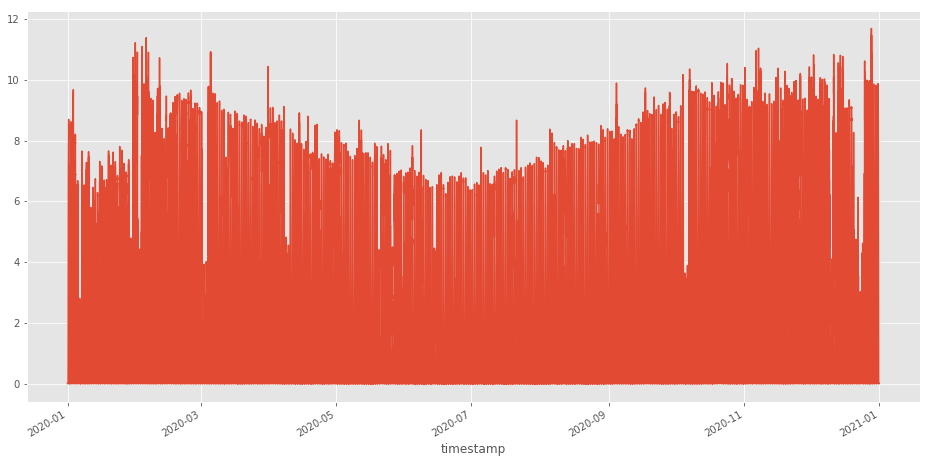

In [16]:
dataset['Active_Power'].plot(figsize=(16,8))
plt.show()

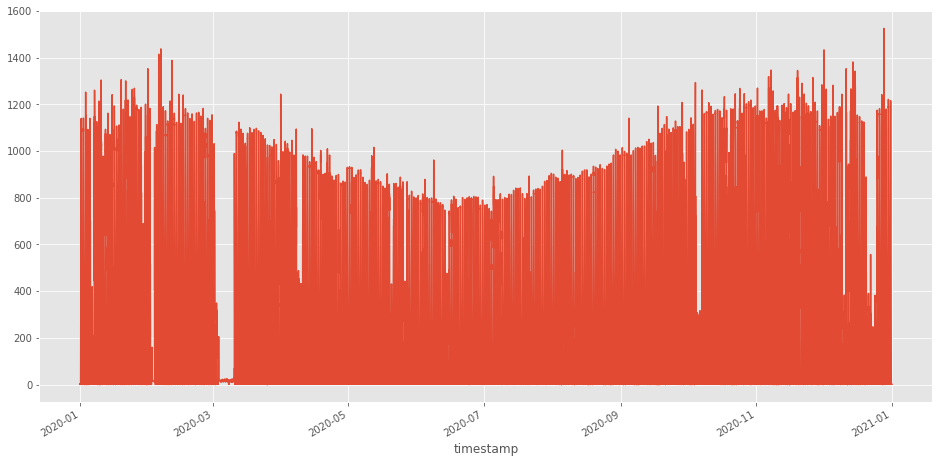

In [17]:
dataset['Global_Horizontal_Radiation'].plot(figsize=(16,8))
plt.show()

# 澳大利亚季节划分：
    春季：9-11
    夏季：12-2
    秋季：3-5
    冬季：6-8

In [18]:
##提取单独月份数据

##春季
Sep = dataset.loc['2020-09',:]

In [19]:
Sep.head()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
timestamp,,,,,,,,,,,,
2020-09-01 00:00:00,531509.0,1.4,0.0,NaN,12.094611,41.554947,1.847994,1.313975,39.455338,0.0,1.754303,1.808440
2020-09-01 00:05:00,531509.0,1.4,0.0,NaN,12.064206,41.165600,1.568181,1.105453,39.436382,0.0,1.657780,1.775042
2020-09-01 00:10:00,531509.0,1.4,0.0,NaN,11.937954,42.311668,1.524848,0.980587,39.404491,0.0,1.769562,1.915757
2020-09-01 00:15:00,531509.0,1.4,0.0,NaN,11.995971,42.417736,1.488850,0.962755,39.405472,0.0,1.773048,1.819603
2020-09-01 00:20:00,531509.0,1.4,0.0,NaN,11.969023,42.515388,2.056905,1.542695,39.483158,0.0,1.683636,1.605784


In [20]:
Sep.tail()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
timestamp,,,,,,,,,,,,
2020-09-30 23:35:00,533344.0,1.394667,0.0,NaN,19.044760,35.871609,2.851528,2.426148,36.842148,0.0,2.325799,2.423936
2020-09-30 23:40:00,533344.0,1.393333,0.0,NaN,18.770094,37.196518,2.687185,2.368465,36.914402,0.0,2.451859,2.647087
2020-09-30 23:45:00,533344.0,1.395334,0.0,NaN,18.579056,38.630657,2.278249,1.702488,36.922962,0.0,2.265396,2.392267
2020-09-30 23:50:00,533344.0,1.389333,0.0,NaN,18.468716,39.071671,2.247767,1.838495,37.029621,0.0,2.115476,2.207150
2020-09-30 23:55:00,533344.0,1.396667,0.0,NaN,18.307009,39.302277,2.075492,1.710448,37.044357,0.0,1.823066,1.953290


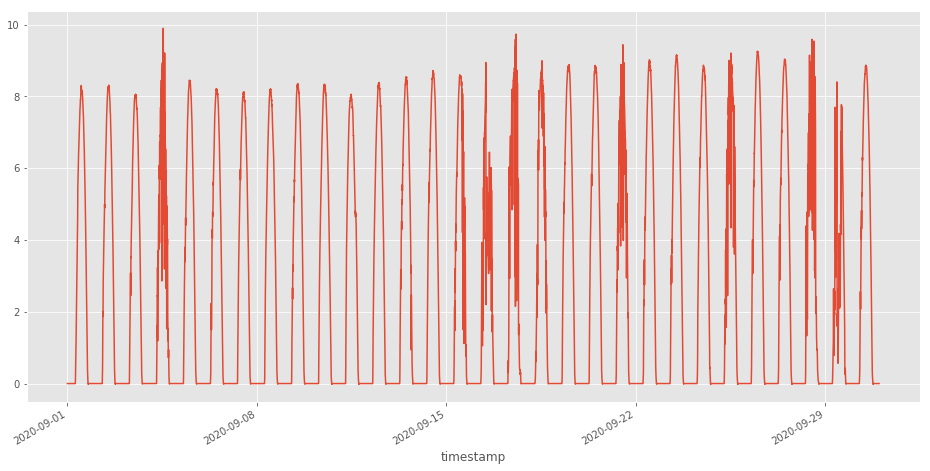

In [21]:
Sep['Active_Power'].plot(figsize=(16,8))
plt.show()

In [22]:
##提取单独月份数据

##夏季
Jan = dataset.loc['2020-01',:]

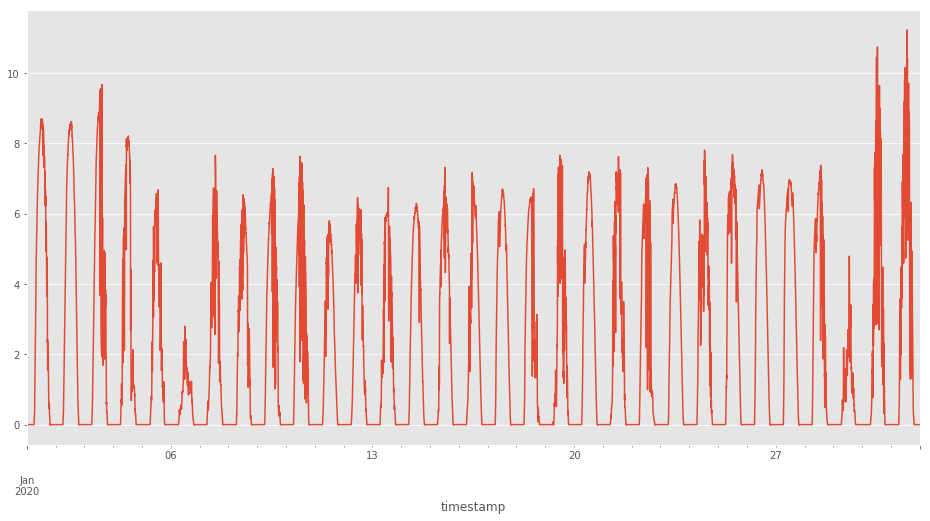

In [23]:
Jan['Active_Power'].plot(figsize=(16,8))
plt.show()

In [24]:
##提取单独月份数据

##秋季
Apr = dataset.loc['2020-04',:]

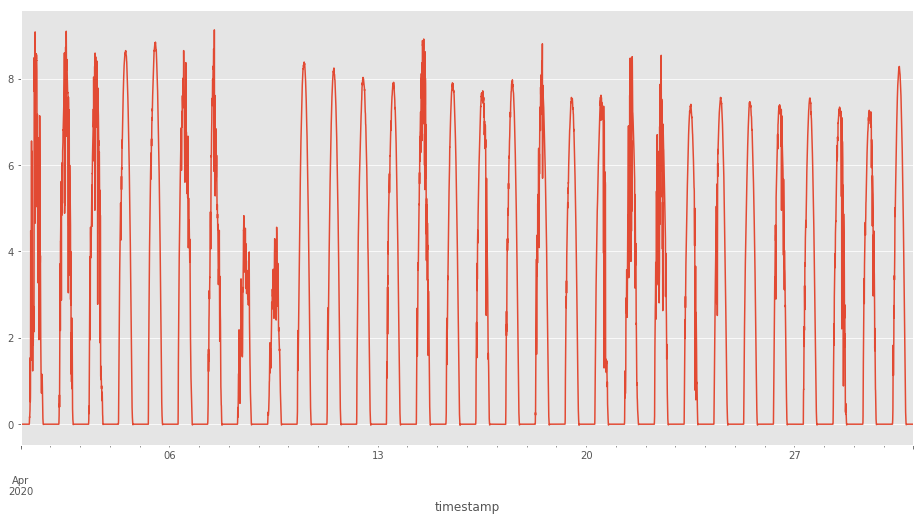

In [25]:
Apr['Active_Power'].plot(figsize=(16,8))
plt.show()

In [26]:
##提取单独月份数据

##冬季
Jul = dataset.loc['2020-07',:]

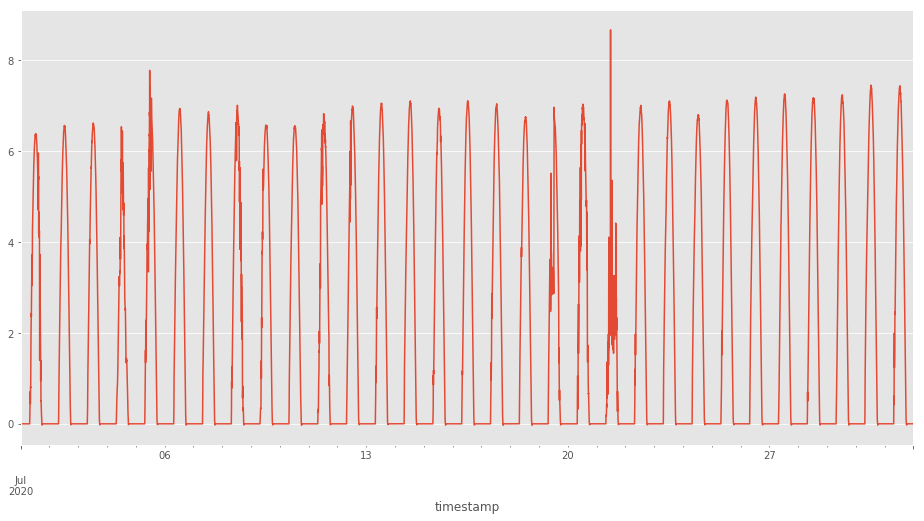

In [27]:
Jul['Active_Power'].plot(figsize=(16,8))
plt.show()

In [28]:
oneday = Jul.loc['2020-07-1']

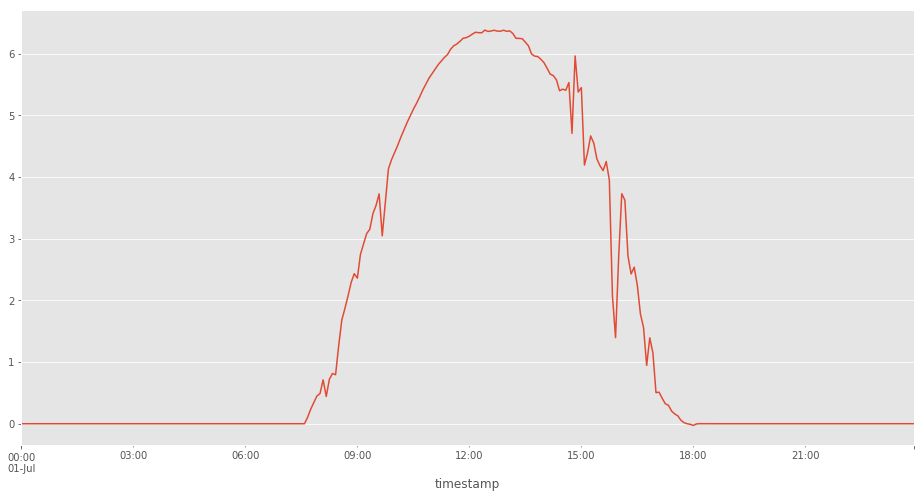

In [29]:
oneday['Active_Power'].plot(figsize=(16,8))
plt.show()

In [30]:
oneday = Jul.loc['2020-07-21']

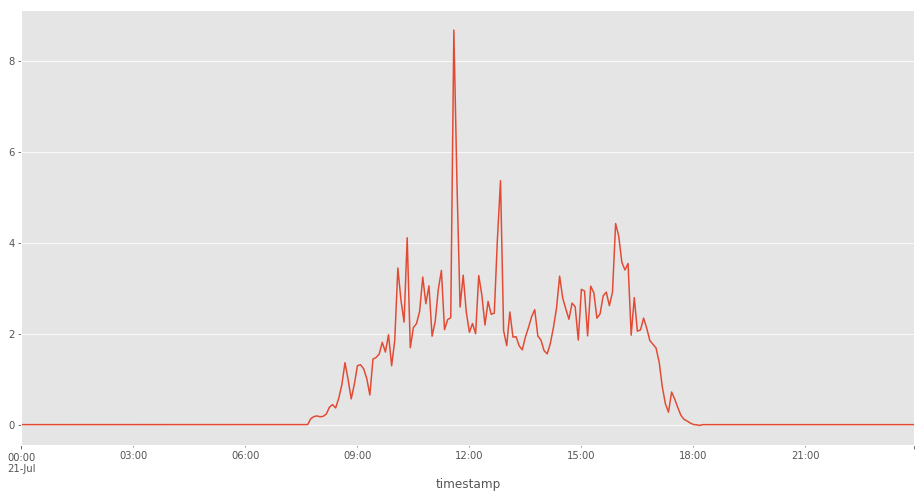

In [31]:
oneday['Active_Power'].plot(figsize=(16,8))
plt.show()

In [32]:
oneday = Jul.loc['2020-07-14']

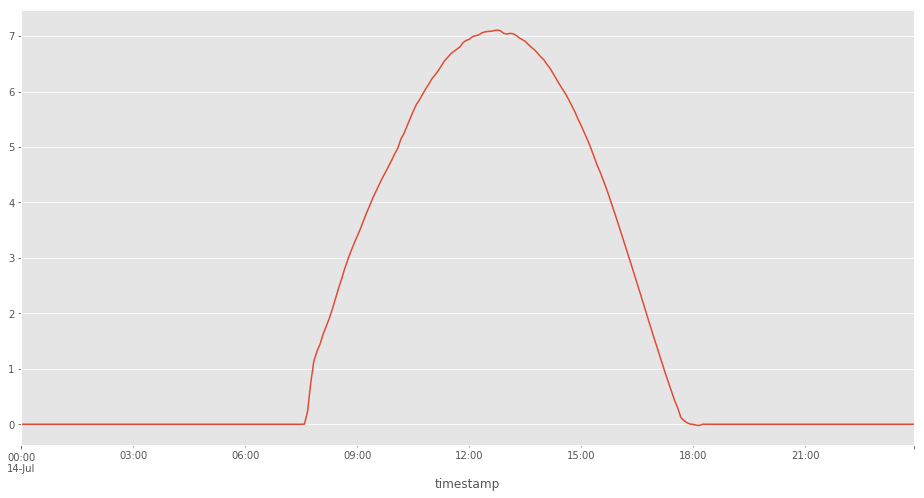

In [33]:
oneday['Active_Power'].plot(figsize=(16,8))
plt.show()

In [34]:
oneday = Sep.loc['2020-09-29']

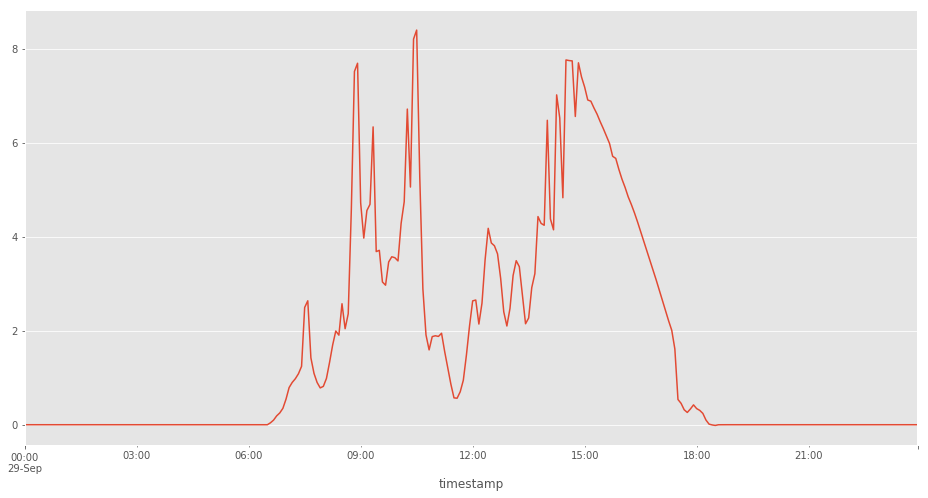

In [35]:
oneday['Active_Power'].plot(figsize=(16,8))
plt.show()

In [36]:
oneday = Sep.loc['2020-09-30']

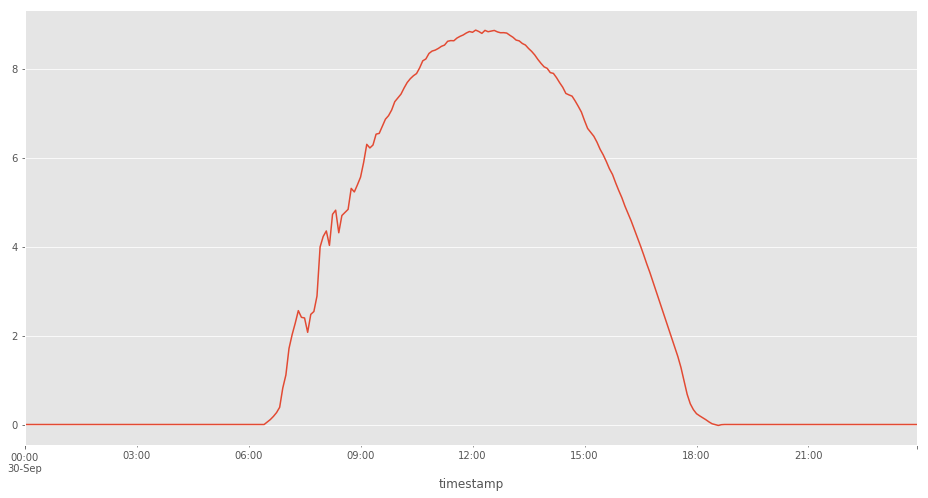

In [37]:
oneday['Active_Power'].plot(figsize=(16,8))
plt.show()

# 三、数据预处理，切片、分割

In [38]:
Power = Jul['Active_Power']

In [39]:
Power.shape

(8928,)

In [40]:
data = pd.DataFrame({
     'Power':Power
 })

In [41]:
data

,Power
timestamp,
2020-07-01 00:00:00,0.0
2020-07-01 00:05:00,0.0
2020-07-01 00:10:00,0.0
2020-07-01 00:15:00,0.0
2020-07-01 00:20:00,0.0
...,...
2020-07-31 23:35:00,0.0
2020-07-31 23:40:00,0.0
2020-07-31 23:45:00,0.0


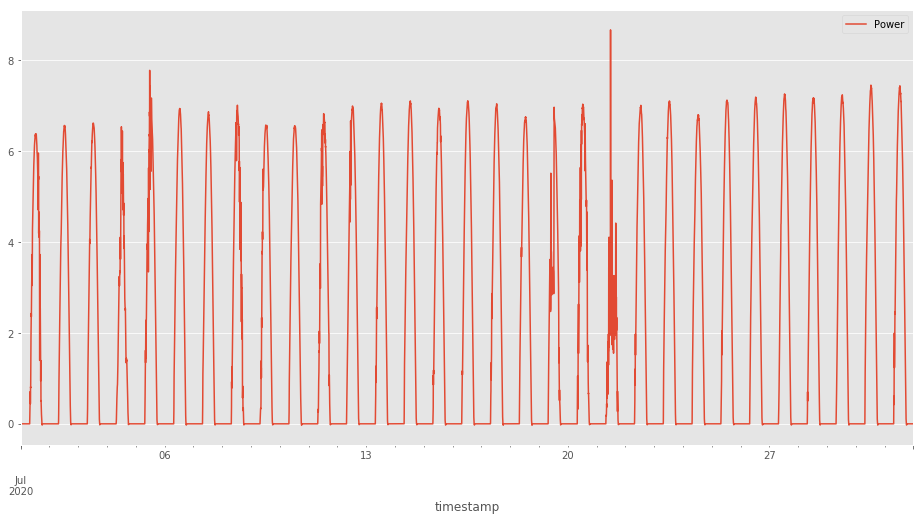

In [42]:
data.plot(figsize=(16,8))
plt.show()

In [43]:
# 数据进行归一化
# 均值为0，标准差为1

scaler = MinMaxScaler()

data['Power'] = scaler.fit_transform(data['Power'].values.reshape(-1, 1))

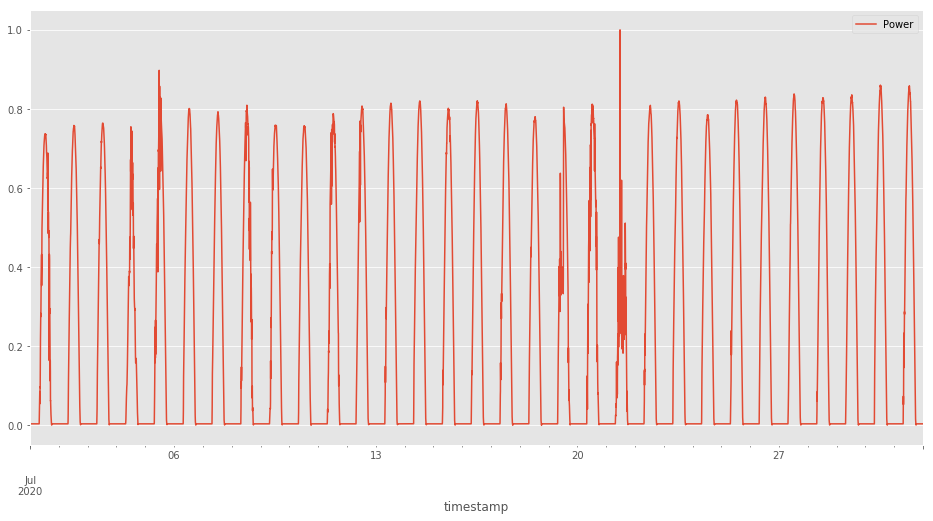

In [44]:
data.plot(figsize=(16,8))
plt.show()

In [45]:
def plot_predictions(test_result, predict_restult):
    """
    test_result: 真实值
    predict_result: 预测值
    """
    plt.figure()
    plt.plot(test_result, color='red', label='True Power')
    plt.plot(predict_restult, color='blue', label="Predict Power")
    plt.title("Pv Power Output")
    plt.xlabel("Time")
    plt.ylabel("Power")
    plt.legend()
    plt.show()

In [46]:
##定义滑动窗口
def create_new_dataset(dataset, seq_len=12):
    '''基于原始数据集构造新的序列特征数据集
    Params:
        dataset : 原始数据集
        seq_len : 序列长度（时间跨度）

    Returns:
        X, y
    '''
    X = []  # 初始特征数据集为空列表
    y = []  # 初始标签数据集为空列表

    start = 0  # 初始位置
    end = dataset.shape[0] - seq_len  # 截止位置

    for i in range(start, end):  # for循环构造特征数据集
        sample = dataset[i: i + seq_len]  # 基于时间跨度seq_len创建样本
        label = dataset[i + seq_len]  # 创建sample对应的标签
        X.append(sample)  # 保存sample
        y.append(label)  # 保存label

    # 返回特征数据集和标签集
    return np.array(X), np.array(y)

In [47]:
##划分训练集、测试集
def split_dataset(X, y, train_ratio=0.8):
    '''基于X和y，切分为train和test
    Params:
        X : 特征数据集
        y : 标签数据集
        train_ratio : 训练集占X的比例

    Returns:
        X_train, X_test, y_train, y_test
    '''
    X_len = len(X)  # 特征数据集X的样本数量
    train_data_len = int(X_len * train_ratio)  # 训练集的样本数量

    X_train = X[:train_data_len]  # 训练集
    y_train = y[:train_data_len]  # 训练标签集

    X_test = X[train_data_len:]  # 测试集
    y_test = y[train_data_len:]  # 测试集标签集

    # 返回值
    return X_train, X_test, y_train, y_test

In [48]:
SEQ_LEN = 12 # 序列长度
X, y = create_new_dataset(data.values, seq_len = SEQ_LEN)

In [49]:
X.shape

(8916, 12, 1)

In [50]:
y.shape

(8916, 1)

In [51]:
##数据集切分
X_train, X_test, y_train, y_test = split_dataset(X, y, train_ratio=0.9)

In [52]:
X_train.shape

(8024, 12, 1)

In [53]:
X_test.shape

(892, 12, 1)

In [54]:
y_train.shape

(8024, 1)

In [55]:
y_test.shape

(892, 1)

# 四、搭建模型

In [56]:
model = Sequential()
model.add(layers.LSTM(8, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(8, return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(8))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1))

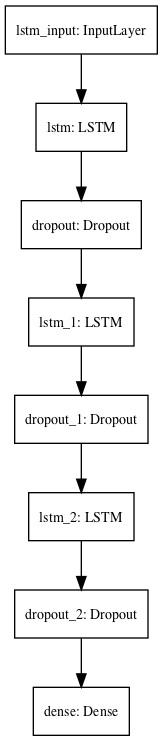

In [57]:
# 显示模型结构

utils.plot_model(model)

In [ ]:
model.summary

# 五、模型训练、测试

In [58]:
# 模型编译
model.compile(optimizer='adam', loss='mse'),

# 模型训练
model.fit(X_train, y_train, epochs=20, batch_size=128),


Train on 8024 samples
Epoch 1/20
8024/8024 [==============================] - 29s 4ms/sample - loss: 0.0475
Epoch 2/20
8024/8024 [==============================] - 7s 907us/sample - loss: 0.0135
Epoch 3/20
8024/8024 [==============================] - 6s 778us/sample - loss: 0.0122
Epoch 4/20
8024/8024 [==============================] - 7s 898us/sample - loss: 0.0109
Epoch 5/20
8024/8024 [==============================] - 7s 922us/sample - loss: 0.0108
Epoch 6/20
8024/8024 [==============================] - 6s 806us/sample - loss: 0.0101
Epoch 7/20
8024/8024 [==============================] - 7s 843us/sample - loss: 0.0098
Epoch 8/20
8024/8024 [==============================] - 7s 914us/sample - loss: 0.0090
Epoch 9/20
8024/8024 [==============================] - 8s 1ms/sample - loss: 0.0085
Epoch 10/20
8024/8024 [==============================] - 7s 893us/sample - loss: 0.0081
Epoch 11/20
8024/8024 [==============================] - 8s 1ms/sample - loss: 0.0073
Epoch 12/20
8024/8024 [=

(<tensorflow.python.keras.callbacks.History at 0x7fe51507e4a8>,)

In [59]:
# 预测
test_pred = model.predict(X_test)

In [60]:
y_test = scaler.inverse_transform(y_test)
test_pred = scaler.inverse_transform(test_pred)

In [61]:
score = r2_score(y_test, test_pred)

MAE = mean_absolute_error(y_test, test_pred)

MSE = mean_squared_error(y_test, test_pred)

RMSE = math.sqrt(MSE)

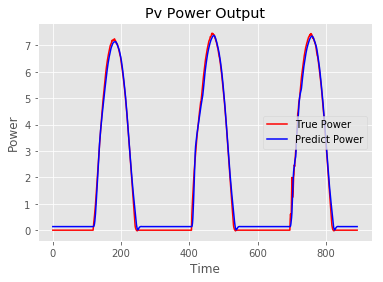

In [63]:
plot_predictions(y_test, test_pred)

In [62]:
print('MAE：',MAE)

print('MSE:',MSE)

print('RMSE:',RMSE)

print("r^2 的值： ", score)

MAE： 0.15542666523641888
MSE: 0.037270930401852906
RMSE: 0.19305680615262677
r^2 的值：  0.995078498209246
